In [3]:
from google.colab import drive
drive.mount('/content/drive')

from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from keras import utils
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add,BatchNormalization
from tensorflow.keras import Sequential
import numpy as np
X_train=pd.read_csv('/content/drive/MyDrive/IoTID20_split/X_train.csv', header=None)
X_test=pd.read_csv('/content/drive/MyDrive/IoTID20_split/X_test.csv', header=None)
y_train=pd.read_csv('/content/drive/MyDrive/IoTID20_split/y_train.csv', header=None)
y_test=pd.read_csv('/content/drive/MyDrive/IoTID20_split/y_test.csv', header=None)
X_train=X_train.drop([0],axis=1)
X_train=X_train.drop([0],axis=0)

X_test=X_test.drop([0],axis=1)
X_test=X_test.drop([0],axis=0)

y_train=y_train.drop([0],axis=1)
y_train=y_train.drop([0],axis=0)

y_test=y_test.drop([0],axis=1)
y_test=y_test.drop([0],axis=0)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

Logistical Classification

In [5]:
%%time
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno
import pickle
from sklearn import model_selection
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

<timed exec>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


CPU times: user 35.5 s, sys: 10.4 s, total: 46 s
Wall time: 26.9 s


In [6]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 74.59%
Recall: 74.59%
Precision: 69.91%
F1-Score: 71.75%
time to train: 26.52 s
time to predict: 0.08 s
total: 26.60 s


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.0000001))
  listf.append(f)

  sumf=sumf+f

listf
print('accuracy =',accuracysum/92340)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

naive_bayes

In [ ]:
%%time
from  sklearn.naive_bayes  import GaussianNB
start = time.time()
model = GaussianNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 713 ms, sys: 49.4 ms, total: 763 ms
Wall time: 761 ms


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 47.01%
Recall: 47.01%
Precision: 60.84%
F1-Score: 45.15%
time to train: 0.51 s
time to predict: 0.25 s
total: 0.76 s


              precision    recall  f1-score   support

           0       1.00      0.09      0.17     11878
           1       0.23      0.94      0.37      5172
           2       0.29      0.67      0.41      5168
           3       0.06      0.00      0.00      5308
           4       0.34      0.18      0.23     17301
           5       0.97      0.84      0.90     28444
           6       0.95      0.52      0.67      7720
           7       0.15      0.92      0.26      3387
           8       0.00      0.00      0.00      7962

    accuracy                           0.47     92340
   macro avg       0.44      0.46      0.33     92340
weighted avg       0.61      0.47      0.45     92340

accuracy = 0.4701104613385315
recall_sum =  0.46198178000482026
precision_sum =  0.4433811272488972
f1 score = 0.3347410216192472


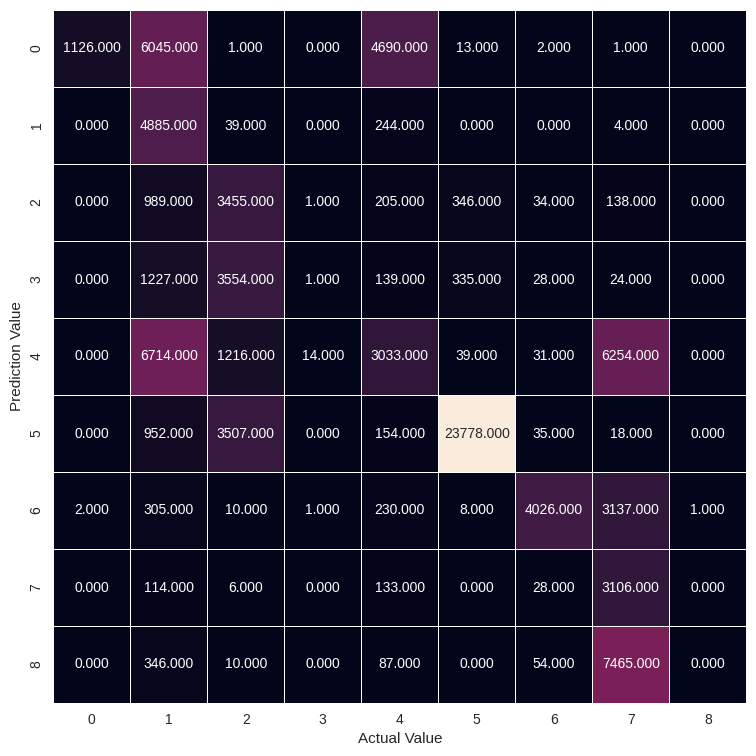

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.0000001))
  listf.append(f)

  sumf=sumf+f

listf
print('accuracy =',accuracysum/92340)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

Decision Tree

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 4.79 s, sys: 26.5 ms, total: 4.82 s
Wall time: 5.07 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 83.91%
Recall: 83.91%
Precision: 87.19%
F1-Score: 85.43%
time to train: 4.91 s
time to predict: 0.03 s
total: 4.94 s


In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 4.28 s, sys: 19.6 ms, total: 4.3 s
Wall time: 4.3 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 83.91%
Recall: 83.91%
Precision: 87.19%
F1-Score: 85.43%
time to train: 4.28 s
time to predict: 0.03 s
total: 4.30 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11878
           1       1.00      1.00      1.00      5172
           2       0.04      0.06      0.05      5168
           3       0.06      0.06      0.06      5308
           4       1.00      1.00      1.00     17301
           5       0.93      0.82      0.88     28444
           6       1.00      1.00      1.00      7720
           7       1.00      1.00      1.00      3387
           8       1.00      1.00      1.00      7962

    accuracy                           0.84     92340
   macro avg       0.78      0.77      0.78     92340
weighted avg       0.87      0.84      0.85     92340

accuracy = 0.8391163092917479
recall_sum =  0.7714170404071414
precision_sum =  0.781236909422981
f1 score = 0.7756023155880395


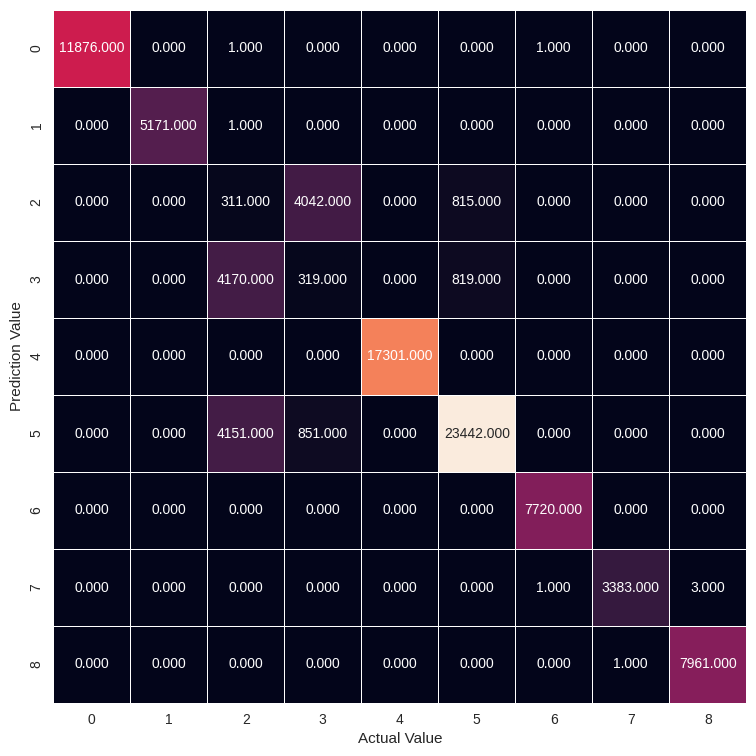

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.0000001))
  listf.append(f)

  sumf=sumf+f

listf
print('accuracy =',accuracysum/92340)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

Extra Trees

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1min 30s, sys: 2.09 s, total: 1min 32s
Wall time: 1min 16s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 83.40%
Recall: 83.40%
Precision: 86.57%
F1-Score: 84.87%
time to train: 73.95 s
time to predict: 2.49 s
total: 76.44 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11878
           1       1.00      0.99      1.00      5172
           2       0.03      0.05      0.04      5168
           3       0.07      0.06      0.07      5308
           4       0.99      1.00      1.00     17301
           5       0.93      0.83      0.88     28444
           6       1.00      1.00      1.00      7720
           7       0.97      0.93      0.95      3387
           8       0.97      0.98      0.98      7962

    accuracy                           0.83     92340
   macro avg       0.77      0.76      0.77     92340
weighted avg       0.87      0.83      0.85     92340

accuracy = 0.8339831059129305
recall_sum =  0.7598386711589473
precision_sum =  0.7724782680305695
f1 score = 0.7655232822578246


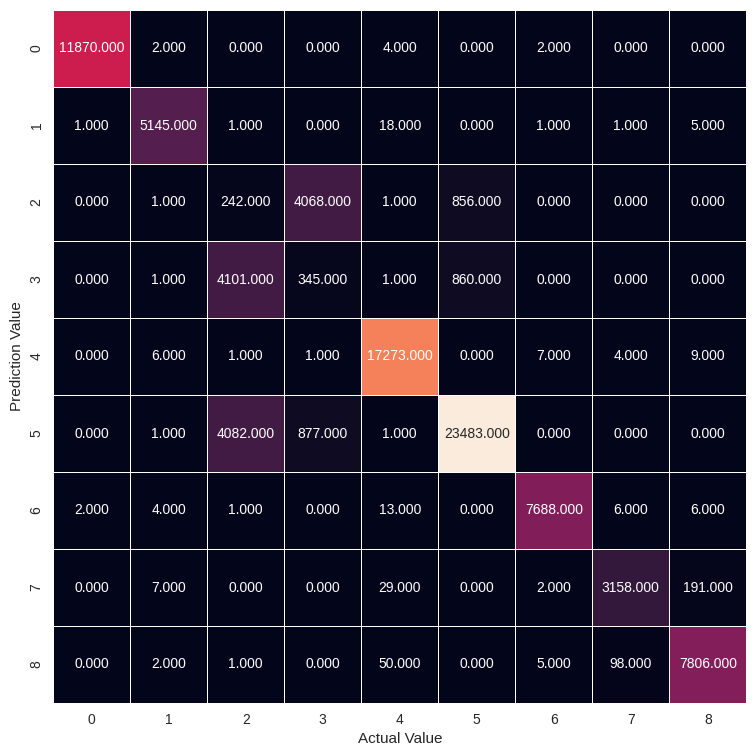

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.0000001))
  listf.append(f)

  sumf=sumf+f

listf
print('accuracy =',accuracysum/92340)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

**Random** Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1min 30s, sys: 492 ms, total: 1min 31s
Wall time: 53.2 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 83.70%
Recall: 83.70%
Precision: 83.63%
F1-Score: 83.67%
time to train: 50.91 s
time to predict: 2.26 s
total: 53.17 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11878
           1       1.00      1.00      1.00      5172
           2       0.04      0.04      0.04      5168
           3       0.07      0.06      0.06      5308
           4       1.00      1.00      1.00     17301
           5       0.82      0.83      0.83     28444
           6       1.00      1.00      1.00      7720
           7       0.98      0.97      0.97      3387
           8       0.99      0.99      0.99      7962

    accuracy                           0.84     92340
   macro avg       0.77      0.77      0.77     92340
weighted avg       0.84      0.84      0.84     92340

accuracy = 0.8370478665800303
recall_sum =  0.7651733213657198
precision_sum =  0.7664835439129098
f1 score = 0.7658145641205699


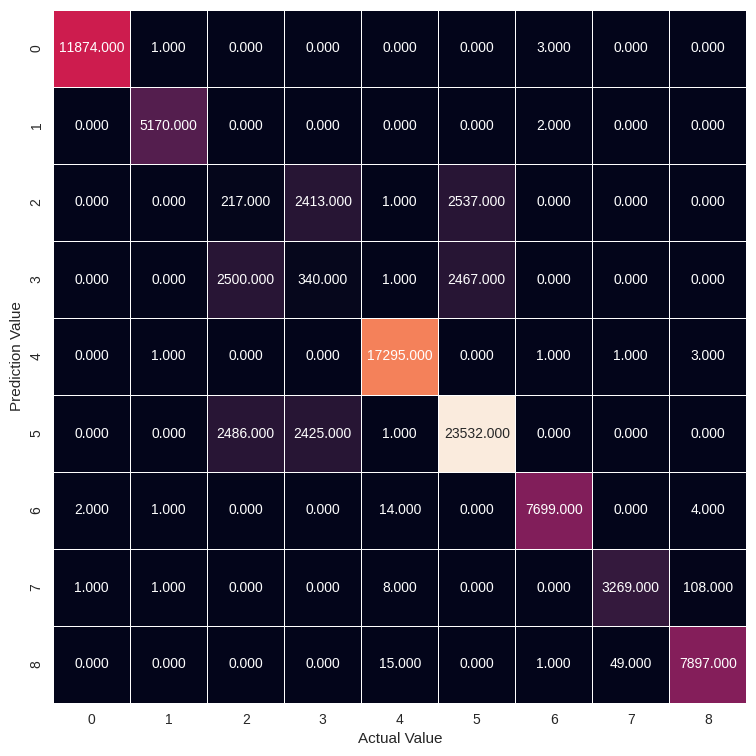

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.0000001))
  listf.append(f)

  sumf=sumf+f

listf
print('accuracy =',accuracysum/92340)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

Gradient Boosting Classifier

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 23min 37s, sys: 13.9 s, total: 23min 51s
Wall time: 23min 59s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.41%
Recall: 88.41%
Precision: 86.92%
F1-Score: 87.42%
time to train: 1438.00 s
time to predict: 1.43 s
total: 1439.43 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11878
           1       1.00      1.00      1.00      5172
           2       0.31      0.32      0.31      5168
           3       0.32      0.15      0.20      5308
           4       1.00      1.00      1.00     17301
           5       0.83      0.91      0.87     28444
           6       1.00      1.00      1.00      7720
           7       1.00      1.00      1.00      3387
           8       1.00      1.00      1.00      7962

    accuracy                           0.88     92340
   macro avg       0.83      0.82      0.82     92340
weighted avg       0.87      0.88      0.87     92340

accuracy = 0.8841022308858566
recall_sum =  0.8190768383217178
precision_sum =  0.8287296253696627
f1 score = 0.8200656108462059


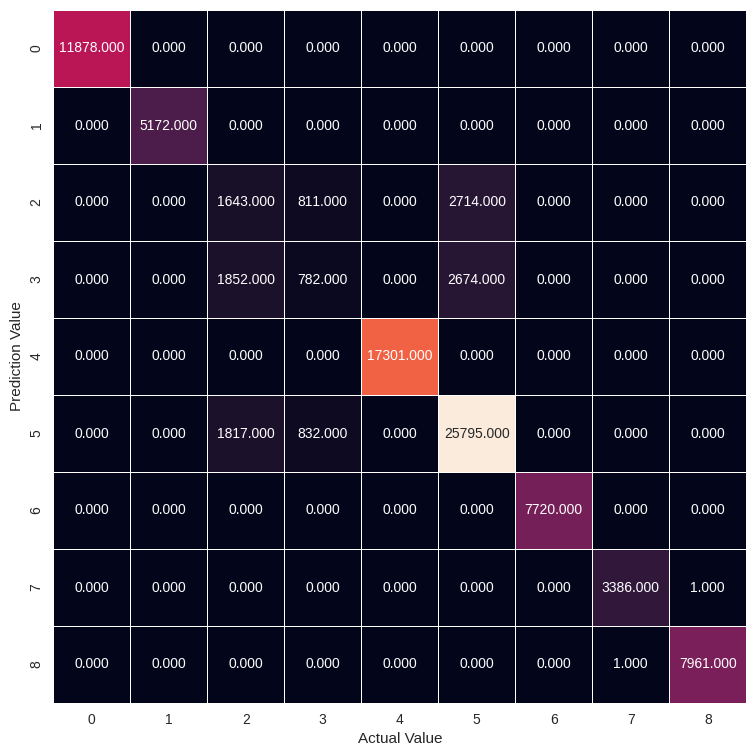

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.0000001))
  listf.append(f)

  sumf=sumf+f

listf
print('accuracy =',accuracysum/92340)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)